In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False

# 绽放反应  

## 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性系数 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放 : 超/烈绽放 = 2 : 3
- 反应伤害提升：如花海四件套效果、妮露固有天赋效果
- 额外收益：如草神2命带来的暴击期望
- 抗性系数:  
$$抗性系数 = \begin{cases}
1 - \frac{抗性}{2} ,& 抗性<0 \\
1 - 抗性 ,& 0 <=抗性<0.75 \\
\frac{1}{1+ 4 * 抗性} ,& 抗性>=0.75 \\
\end{cases}$$

### 公式测试「久岐忍」+「纳西妲」超绽放*  
![测试角色](./asset/image/bloom_test_characters.png)  
89级时的`反应基础伤害 * 等级系数 * 反应基础倍率 = 1405.10 * 3`  
久岐忍战斗状态下精通为`892.30 = 702.30 + 150 + 40`(饰金4 +150精通场景下)  
在纳家做客时`1117.8 = 892.30 + 902.00 * 0.25`
纳西妲命座二效果: 固定的10%暴击,100%暴击伤害  
测试靶子: 海乱鬼-公义全元素抗性`10%`  
纳西妲深林套四件效果: 草属性抗性`-30%`  
抗性系数为`1.1`
伤害计算如下:  

In [3]:
damageTestTable = [
  ['基础不暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1],
  ['基础暴击', 1405.10 * 3 * (1 + (16 * 892.30/(2000 + 892.30))) * 1.1 * 2],
  ['智慧殿堂下不暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1],
  ['智慧殿堂下暴击', 1405.10 * 3 * (1 + (16 * 1117.8/(2000 + 1117.8))) * 1.1 * 2]
]

print(tabulate(damageTestTable, floatfmt='.3f', tablefmt='github'))

|------------------|-----------|
| 基础不暴击       | 27524.876 |
| 基础暴击         | 55049.751 |
| 智慧殿堂下不暴击 | 31235.322 |
| 智慧殿堂下暴击   | 62470.643 |


#### 实测结果
![实测结果1](./asset/image/bloom_test_result_1.jpg)  

## 精通收益与圣遗物  

### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

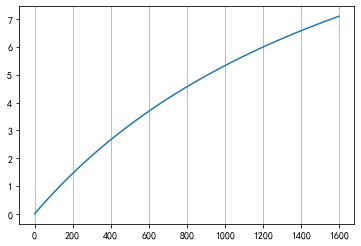

In [4]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.grid(axis='x')
plt.show()

因乐园套增加反应伤害,于是带上反应伤害加成

$$\frac{16*精通}{2000+精通} + 反应伤害加成$$

以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  

- 精通2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 其他精通$$

In [5]:
# 精通2+2
def eFn1(otherEm):
  return 165 + 80*2 + 187*3 + otherEm

- 饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算。注:双草共鸣可给全队加成最大100精通,有条件可以上双草)
$$精通 = 165 + 80 + 150 + 187 * 3 + 其他精通$$

In [6]:
# 饰金2个不同属性队友
def eFn2(otherEm):
  return 165 + 80 + 100 + 187*3 + otherEm
# 饰金3个不同属性队友
def eFn3(otherEm):
  return 165 + 80 + 150 + 187*3 + otherEm

- 乐园(花神):  
$$精通 = 165 + 80 + 187 * 3 + 其他精通$$
$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$

In [7]:
# 乐园
def eFn4(otherEm):
  return 165 + 80 + 187*3 + otherEm

### 圣遗物副词条精通上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|----|----|----|
| 16 19 21 32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 |

### 按照副词条提供的精通,不同套装提供的加成

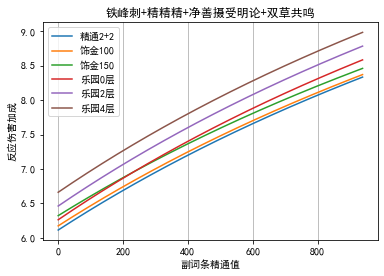

In [8]:
# 副词条 + 草神净善摄受明论250 + 双草100
subEm = np.arange(0, 250 + 138 * 5)
em1 = eFn1(subEm + 250 + 100)
em2= eFn2(subEm + 250 + 100)
em3 = eFn3(subEm + 250 + 100)
em4 = eFn4(subEm + 250 + 100)
plt.plot(subEm, (16 * em1)/(2000 + em1), label = '精通2+2')
plt.plot(subEm, (16 * em2)/(2000 + em2), label = '饰金100')
plt.plot(subEm, (16 * em3)/(2000 + em3), label = '饰金150')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.4, label = '乐园0层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.6, label = '乐园2层')
plt.plot(subEm, (16 * em4)/(2000 + em4) + 0.8, label = '乐园4层')
plt.xlabel('副词条精通值')
plt.ylabel('反应伤害加成')
plt.title('铁峰刺+精精精+净善摄受明论+双草共鸣')
plt.legend()
plt.grid(axis='x')
plt.show()

#### 副词条250 草神大招250 双草100, 各套装加成差距

In [9]:
em3001 = eFn1(250 + 250 + 100)
em3002 = eFn2(250 + 250 + 100)
em3003 = eFn3(250 + 250 + 100)
em3004 = eFn4(250 + 250 + 100)
dm3001 = (16 * em3001)/(2000 + em3001)
dm3002 = (16 * em3002)/(2000 + em3002)
dm3003 = (16 * em3003)/(2000 + em3003)
dm30040 = (16 * em3004)/(2000 + em3004) + 0.4
dm30042 = (16 * em3004)/(2000 + em3004) + 0.6
dm30044 = (16 * em3004)/(2000 + em3004) + 0.8
dm300Table = [
    ['精通2+2', None, dm3002 - dm3001, dm3003 - dm3001, dm30040- dm3001, dm30042 - dm3001, dm30044- dm3001],
    ['饰金100', dm3001 - dm3002, None, dm3003 - dm3002, dm30040- dm3002, dm30042 - dm3002, dm30044- dm3002],
    ['饰金150', dm3001 - dm3003, dm3002 - dm3003, None, dm30040- dm3003, dm30042 - dm3003, dm30044- dm3003],
    ['乐园0层', dm3001 - dm30040, dm3002- dm30040, dm3003 - dm30040, None, dm30042 - dm30040, dm30044 - dm30040],
    ['乐园2层', dm3001 - dm30042, dm3002- dm30042, dm3003 - dm30042, dm30040 - dm30042, None, dm30044 - dm30042],
    ['乐园4层', dm3001 - dm30044, dm3002- dm30044, dm3003 - dm30044, dm30040- dm30044, dm30042 - dm30044, None],
]
print(tabulate(dm300Table, ['', '精通2+2', '饰金100', '饰金150', '乐园0层', '乐园2层', '乐园4层'], floatfmt='.3f', tablefmt='github'))

|         |   精通2+2 |   饰金100 |   饰金150 |   乐园0层 |   乐园2层 |   乐园4层 |
|---------|-----------|-----------|-----------|-----------|-----------|-----------|
| 精通2+2 |           |     0.052 |     0.181 |     0.184 |     0.384 |     0.584 |
| 饰金100 |    -0.052 |           |     0.128 |     0.132 |     0.332 |     0.532 |
| 饰金150 |    -0.181 |    -0.128 |           |     0.004 |     0.204 |     0.404 |
| 乐园0层 |    -0.184 |    -0.132 |    -0.004 |           |     0.200 |     0.400 |
| 乐园2层 |    -0.384 |    -0.332 |    -0.204 |    -0.200 |           |     0.200 |
| 乐园4层 |    -0.584 |    -0.532 |    -0.404 |    -0.400 |    -0.200 |           |


## 妮绽放(原绽放)

### 固有天赋 翩舞永世之梦  
基于妮露的生命值上限超过30000部分，每1000生命值将使处于「金杯的丰馈」状态下的角色，绽放反应伤害提升9%，至多提升400%
$$ 0.4 = \frac{n - 30000}{1000} * 0.009$$

In [10]:
print(0.4 * 10000 / 0.009 + 30000)

474444.4444444445



### 妮露生命值计算
**需求: >74444HP**  

| 加成方式(全满级) | 生命加成 |
|---|---|
| 基础生命值 | 15184(+28.8%等级突破加成) |
| 圣遗物主属性-花 | 4780 |
| 圣遗物主属性-杯 | 46.6% |
| 圣遗物主属性-沙 | 46.6% |
| 圣遗物主属性-冠 | 46.6% |
| 圣遗物2件套-千岩 | 20% |
| 圣遗物2件套-花海 | 20% |
| 双水共鸣 | 25% |
| 武器副属性-圣显之钥 | 66.15% |
| 圣遗物副词条-百分比 | a% |
| 圣遗物副词条-数值 | b |

#### 圣遗物副词条生命上下限

| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 |
|---|---|---|---|---|---|
| 4.1% 4.7% 5.3% 5.8% | 8.2%-11.6% | 12.3%-17.4% | 16.4%-23.2% | 20.5%-29% | 24.6%-34.8% |
| 209 239 269 299 | 418-598 | 627-897 | 836-1196 | 1045-1495 | 1254-1794 |

In [11]:
# expect
expectHp = 74444

baseHp = 15184 + 4780

# 0+1 2+2
hp1 = baseHp * (1  + 0.25 + 0.6615 + 0.2 + 0.466 * 3 + 0.2 * 2)
# 0+1 2+0
hp2 = baseHp * (1 + 0.25 + 0.6615 + 0.2 + 0.466 * 3 + 0.2)
# 0+1
hp3 = baseHp * (1 + 0.25 + 0.6615 + 0.2 + 0.466 * 3)
# 0+0 2+2
hp4 = baseHp * (1 + 0.25 + 0.466 * 3 + 0.2 * 2)
# 0+0 2+0
hp5 = baseHp * (1 + 0.25 + 0.466 * 3 + 0.2)
# 0+0
hp6 = baseHp * (1 + 0.25 + 0.466 * 3)
# 磐岩结绿 2+2
hp7 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3 + 0.2 * 2)
# 磐岩结绿 2+0
hp8 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3 + 0.2)
# 磐岩结绿
hp9 = baseHp * (1 + 0.25 + 0.2 + 0.466 * 3)

hpTable = [
    ['双水 生生生 生命2+2 专武', hp1, None, None],
    ['双水 生生生 生命2 专武', hp2, (expectHp - hp2)/baseHp * 100, (expectHp - hp2)/baseHp/5 * 100],
    ['双水 生生生 专武', hp3, (expectHp - hp3)/baseHp * 100, (expectHp - hp3)/baseHp/5 * 100],
    ['双水 生生生 生命2+2', hp4, (expectHp - hp4)/baseHp * 100, (expectHp - hp4)/baseHp/5 * 100],
    ['双水 生生生 生命2', hp5, (expectHp - hp5)/baseHp * 100, (expectHp - hp5)/baseHp/5 * 100],
    ['双水 生生生', hp6, (expectHp - hp6)/baseHp * 100, (expectHp - hp6)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1] 生命2+2', hp7, (expectHp - hp7)/baseHp * 100, (expectHp - hp7)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1] 生命2', hp8, (expectHp - hp8)/baseHp * 100, (expectHp - hp8)/baseHp/5 * 100],
    ['双水 生生生 磐岩结绿[1]', hp9, (expectHp - hp9)/baseHp * 100, (expectHp - hp9)/baseHp/5 * 100]
]
print(tabulate(hpTable, headers = ['加成方式', 'HP', '需求副词条生命%', '平均需求副词条生命%'], floatfmt='.2f', tablefmt='github'))

| 加成方式                        |       HP |   需求副词条生命% |   平均需求副词条生命% |
|---------------------------------|----------|-------------------|-----------------------|
| 双水 生生生 生命2+2 专武        | 78049.26 |                   |                       |
| 双水 生生生 生命2 专武          | 74056.46 |              1.94 |                  0.39 |
| 双水 生生生 专武                | 70063.66 |             21.94 |                  4.39 |
| 双水 生生生 生命2+2             | 60850.27 |             68.09 |                 13.62 |
| 双水 生生生 生命2               | 56857.47 |             88.09 |                 17.62 |
| 双水 生生生                     | 52864.67 |            108.09 |                 21.62 |
| 双水 生生生 磐岩结绿[1] 生命2+2 | 64843.07 |             48.09 |                  9.62 |
| 双水 生生生 磐岩结绿[1] 生命2   | 60850.27 |             68.09 |                 13.62 |
| 双水 生生生 磐岩结绿[1]         | 56857.47 |             88.09 |                 17.62 |


妮露单水情况下产种子不足,通常都带双水,且专武提升恐怖。在专武情况下可选择的圣遗物较多, 无专武情况下可能需要生命2+2或生命2+精通2的搭配。  

### 妮绽放中的生命与精通

#### 在无法满足天赋生命上限的情况下,选择生命2还是精通2
**通常选择生命2**,因为天赋是对全队种子的增伤,而精通仅妮露触发种子绽放时才会有增伤效果。  
增伤计算:  
$$妮露精通2增伤 = \frac{16*(精通 + 80)}{2000+精通 + 80} - \frac{16*精通}{2000+精通}$$
$$\begin{split}
妮露生命2增伤 &= \frac{生命 + (15184 + 4780) * 0.2 - 30000}{10000} * 0.09 - \frac{生命 - 30000}{10000} * 0.09 \\
&= 0.359352
\end{split}$$

#### 在还未满足天赋生命上限的情况下,选择生命2还是精通2

**通常选择生命2**,因为天赋是对全队种子的增伤,而精通仅妮露触发种子绽放时才会有增伤效果。  
增伤计算:  
$$妮露精通2增伤 = \frac{16*(精通 + 80)}{2000+精通 + 80} - \frac{16*精通}{2000+精通}$$
$$\begin{split}
妮露生命2增伤 &= \frac{生命 + (15184 + 4780) * 0.2 - 30000}{10000} * 0.09 - \frac{生命 - 30000}{10000} * 0.09 \\
&= 0.359352
\end{split}$$

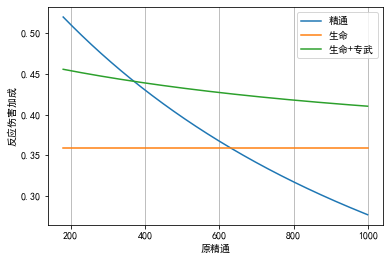

In [12]:
oEm = np.arange(180, 1000)
plt.plot(oEm, (16 * (oEm + 80))/(2000 + oEm + 80) - (16 * oEm)/(2000 + oEm), label = '精通')
plt.plot(oEm, np.repeat(0.359352, oEm.size), label = '生命')
plt.plot(oEm, (16 * (oEm + 14.374))/(2000 + oEm + 14.374) - (16 * oEm)/(2000 + oEm) + 0.359352, label = '生命+专武')
plt.grid(axis='x')
plt.xlabel('原精通')
plt.ylabel('反应伤害加成')
plt.legend()
plt.show()

**那对于圣遗物主词条187精通与46.6%生命呢?**  

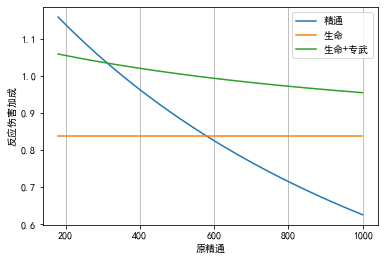

In [13]:
oEm = np.arange(180, 1000)
plt.plot(oEm, (16 * (oEm + 187))/(2000 + oEm + 187) - (16 * oEm)/(2000 + oEm), label = '精通')
plt.plot(oEm, np.repeat((15194 + 4780) * 0.466 / 1000 * 0.09, oEm.size), label = '生命')
plt.plot(oEm, (16 * (oEm + 33.4916))/(2000 + oEm + 33.4916) - (16 * oEm)/(2000 + oEm) + (15194 + 4780) * 0.466 / 1000 * 0.09, label = '生命+专武')
plt.grid(axis='x')
plt.xlabel('原精通')
plt.ylabel('反应伤害加成')
plt.legend()
plt.show()

由于生命十分好堆叠,生命带来的收益又会给整个队伍的绽放反应带来提升,精通的收益越来越低,建议:优先考虑满足固有天赋的生命上限74444

#### 无专武妮绽放(双水、生生生、生命2+2)
双水、生生生、生命2+2 还需圣遗物副词条+68.09%(平均每个圣遗物+13.62%)生命值。如有磐岩结绿,则仅需+48.09%(+9.62%)。
如带铁峰刺或东花坊时雨则增加165精通。 
##### 场景: 双水双草 使用165精通4星武器 圣遗物副词条优先生命满足74444
- 妮露精通`165 + 100 + 80 + 副词条精通 (+ 250)`

In [14]:
nDamageTest1Table = [
  ['无精通副词条不暴击', 1447 * 2 * (1 + (16 * 345/(2000 + 345)) + 4) * 1.1],
  ['无精通副词条暴击', 1447 * 2 * (1 + (16 * 345/(2000 + 345)) + 4) * 1.1 * 2],
  ['智慧殿堂下不暴击', 1447 * 2 * (1 + (16 * 595/(2000 + 595)) + 4) * 1.1],
  ['智慧殿堂下暴击', 1447 * 2 * (1 + (16 * 595/(2000 + 595)) + 4) * 1.1 * 2]
]

print(tabulate(nDamageTest1Table, floatfmt='.3f', tablefmt='github'))

|--------------------|-----------|
| 无精通副词条不暴击 | 23410.547 |
| 无精通副词条暴击   | 46821.094 |
| 智慧殿堂下不暴击   | 27595.600 |
| 智慧殿堂下暴击     | 55191.201 |


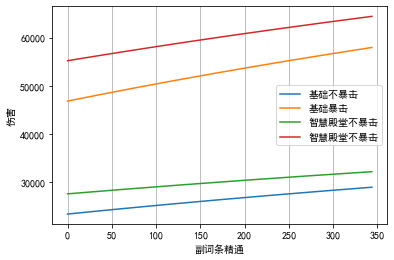

In [15]:
def nTest2Fn(em):
    return 1447 * 2 * (1 + (16 * em/(2000 + em)) + 4) * 1.1
nTest2SubEm = np.arange(0, 69 * 5)
nTest2Y1 = nTest2Fn(345 + nTest2SubEm)
nTest2Y2 = nTest2Y1 * 2
nTest2Y3 = nTest2Fn(345 + 250 + nTest2SubEm)
nTest2Y4 = nTest2Y3 * 2
plt.plot(nTest2SubEm, nTest2Y1, label = '基础不暴击')
plt.plot(nTest2SubEm, nTest2Y2, label = '基础暴击')
plt.plot(nTest2SubEm, nTest2Y3, label = '智慧殿堂不暴击')
plt.plot(nTest2SubEm, nTest2Y4, label = '智慧殿堂不暴击')
plt.grid(axis='x')
plt.xlabel('副词条精通')
plt.ylabel('伤害')
plt.legend()
plt.show()

也适用于其他角色(如❤)触发反应

#### 专武妮绽放(双水、生生生、专武)
可以选择的圣遗物更多：饰金4 乐园4 精通2+2, 甚至还可以水伤